In [41]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure



In [42]:
def enhance_cctv_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    plt.imshow(image)
    plt.title("input image")
    plt.show()
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    plt.imshow(equalized_image,cmap='gray')
    plt.title("Equalized image")
    plt.show()

    # Apply contrast stretching
    p2, p98 = np.percentile(equalized_image, (2, 98))
    stretched_image = exposure.rescale_intensity(equalized_image, in_range=(p2, p98))
    plt.imshow(stretched_image,cmap='gray')
    plt.title("Streched image")
    plt.show()

    # Convert the enhanced image back to color
    enhanced_image = cv2.cvtColor(stretched_image, cv2.COLOR_GRAY2BGR)

    return enhanced_image

Enter the image number (1, 2, 3 or 4): 4


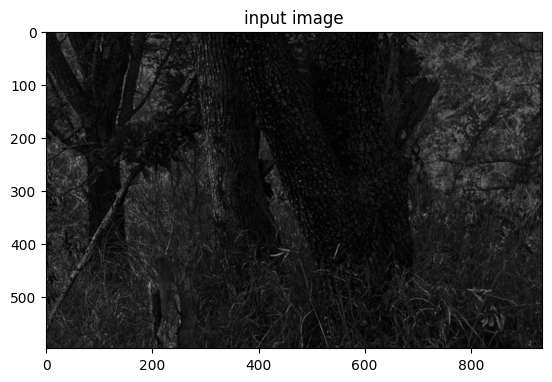

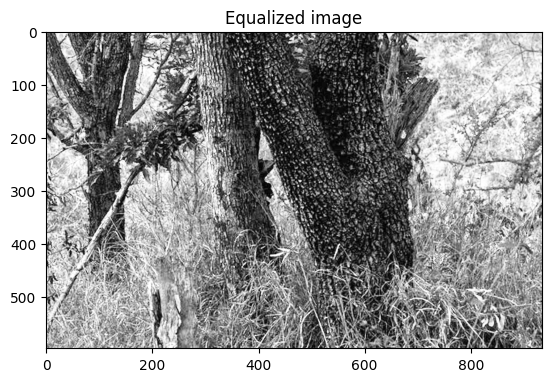

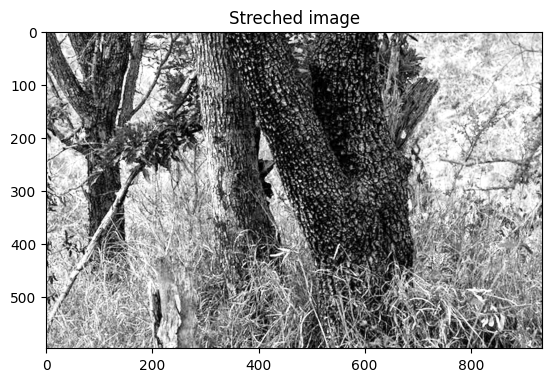

True

In [43]:

# Take user input for image selection
image_number = input("Enter the image number (1, 2, 3 or 4): ")


# Generate the input and output file paths
input_image_path = f'cctv{image_number}.JPG'
output_image_path = f'enhanced-cctv{image_number}.JPG'

# Enhance the image
enhanced_image = enhance_cctv_image(input_image_path)

# Save the enhanced image
cv2.imwrite(output_image_path, enhanced_image)



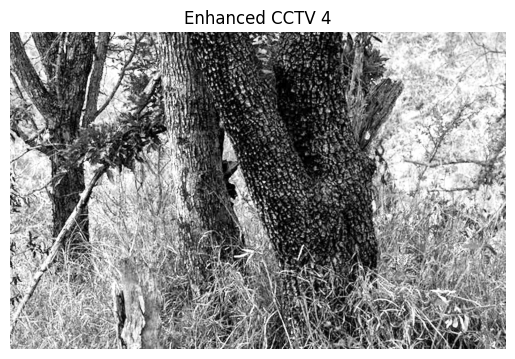

In [44]:
# Display the enhanced image
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title(f'Enhanced CCTV {image_number}')
plt.axis('off')
plt.show()